In [38]:
import pandas as pd
import numpy as np
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
## Which state has the best outcomes in the event of a heart attack?

In [10]:
TEC = pd.read_csv('Hospital_Revised_Flatfiles/Timely and Effective Care - State.csv')

In [11]:
TEC_Heart = TEC[TEC.Condition == 'Heart Attack or Chest Pain']
TEC_Heart=TEC_Heart.rename(columns = {'Measure Name':'MeasureName'})


In [16]:
##Can you count something interesting? 
##I will count the number of states in which the median time to fibrolytic treatment is greater than 30 minutes. Administration within 30 minutes is standard of care.


In [12]:
TEC_Heart_LongFL = TEC_Heart[TEC_Heart.MeasureName == 'Median Time to Fibrinolysis']
TEC_Heart_LongFL.Score=pd.to_numeric(TEC_Heart_LongFL.Score, errors='coerce')

## I dont know what this error is, but I am going to leave it since it took me so long to figure out how to turn the column into a numeric

C:\Users\Maria Murray\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
len(TEC_Heart_LongFL.Score[TEC_Heart_LongFL.Score > 30]) 


15

In [ ]:
## Can you find some trends?
## In order to find trends, I broke it down based on Region

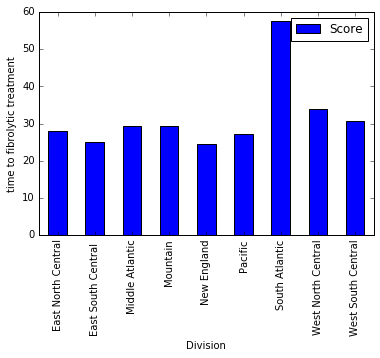

In [49]:
## In which region does it take longest to obtain fibrolytic therapy?
HLFL = TEC_Heart_LongFL
HLFL.groupby('Division').mean().plot(kind='bar')
plt.ylabel('minutes to fibrolytic treatment')

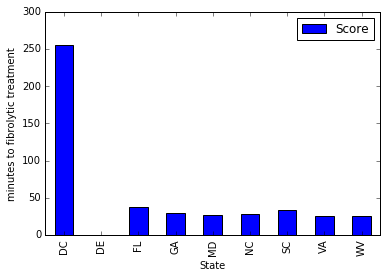

In [61]:
## Are there any states in the South Atlantic that are disrupting the average?
HLFL_SE = TEC_Heart_LongFL[TEC_Heart_LongFL.Division == 'South Atlantic']
HLFL_SE.plot(x= 'State', y='Score', kind='bar')
plt.ylabel('minutes to fibrolytic treatment')
#It appears that DC is a huge outlier in this data. It is very curious

C:\Users\Maria Murray\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


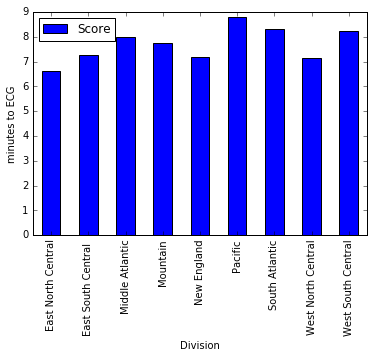

In [51]:
## In which region does it take longest to obtain an ECG?
TEC_Heart_ECGTime = TEC_Heart[TEC_Heart.MeasureName == 'Median Time to ECG']
TEC_Heart_ECGTime.Score=pd.to_numeric(TEC_Heart_ECGTime.Score, errors='coerce')
TEC_Heart_ECGTime.groupby('Division').mean().plot(kind='bar')
plt.ylabel('minutes to ECG')

C:\Users\Maria Murray\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


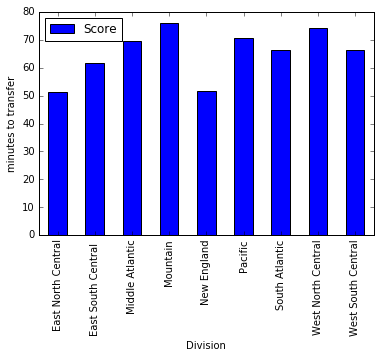

In [52]:
## In which region does it take longest to transfer to another facitily for Acute Coronary Intervention?
TEC_Heart_ACI= TEC_Heart[TEC_Heart.MeasureName == 'Median Time to Transfer to Another Facility for Acute Coronary Intervention']
TEC_Heart_ACI.Score=pd.to_numeric(TEC_Heart_ACI.Score, errors='coerce')
TEC_Heart_ACI.groupby('Division').mean().plot(kind='bar')
plt.ylabel('minutes to transfer')

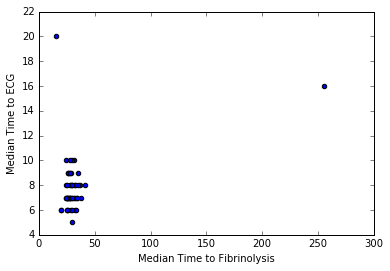

In [58]:
## I am going to make a scatterplot comparing minutes to ECG and minutes to antifibrolytic treatment. Each data plot will be a state
TEC_Heart.Score=pd.to_numeric(TEC_Heart.Score, errors='coerce')
HeartPivot = TEC_Heart.pivot(index='State', columns='MeasureName', values='Score')
HeartPivot.plot(kind='scatter', x='Median Time to Fibrinolysis', y='Median Time to ECG')